In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import xgboost as xgb
% %matplotlib inline

In [2]:
train_df = pd.read_csv('happiness_train_abbr.csv')
test_df = pd.read_csv('happiness_test_abbr.csv')
combine = [train_df, test_df]
train_df.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,...,60000.0,2,2,1,2,3,3,2,4,3
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,...,40000.0,3,4,1,2,1,1,1,4,2
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,...,8000.0,3,3,1,2,3,2,1,4,2
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,...,12000.0,3,3,1,1,7,2,1,3,2
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,...,-2.0,4,3,1,1,1,3,2,3,-8


In [3]:
train_df['happiness'].value_counts()

 4    4818
 5    1410
 3    1159
 2     497
 1     104
-8      12
Name: happiness, dtype: int64

In [4]:
li=[i for i in range(15)]
train_df=train_df[(train_df['happiness'].isin(li[1:6]))]

In [5]:
train_df['happiness'].value_counts()

4    4818
5    1410
3    1159
2     497
1     104
Name: happiness, dtype: int64

In [6]:
x=[4818,1410,1159,497,104]

In [7]:
labels=[4,5,3,2,1]

In [8]:
labels

[4, 5, 3, 2, 1]

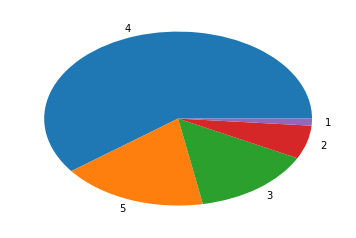

In [9]:
plt.pie(x,labels=labels)
plt.show()

由饼图中看出比较幸福的人占多数，由于特征太多，决定看一下方差矩阵，挑比较重要的参数进行数据清理和预处理。

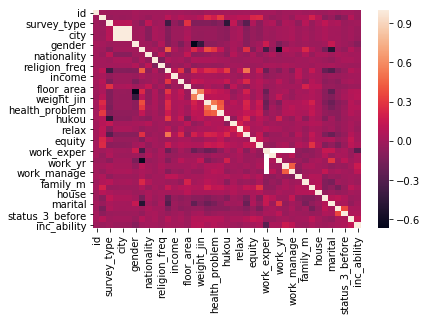

In [10]:
corr = train_df.corr()
sns.heatmap(corr)

特征数太多，采用xgboost筛选重要特征，和happiness相关度最高的十个特征

In [11]:
pd.set_option('max_columns',100)
train_df.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,1,1,11,20000,1,45.0,176,155,3,2,5,5,2,4,3,3,3,1,3.0,30.0,1.0,2.0,60000.0,2,2,1,2,3,3,2,4,3
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,1,1,12,20000,1,110.0,170,110,5,4,3,1,2,4,3,3,6,1,3.0,2.0,1.0,3.0,40000.0,3,4,1,2,1,1,1,4,2
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,0,3,4,2000,1,120.0,160,122,4,4,5,1,3,4,2,4,5,2,NaN,NaN,NaN,NaN,8000.0,3,3,1,2,3,2,1,4,2
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,1,1,3,6420,1,78.0,163,170,4,4,4,1,2,4,4,4,5,4,NaN,NaN,NaN,NaN,12000.0,3,3,1,1,7,2,1,3,2
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,1,1,12,-1,2,70.0,165,110,5,5,3,2,4,3,4,2,1,6,NaN,NaN,NaN,NaN,-2.0,4,3,1,1,1,3,2,3,-8


In [12]:
train_df['Age']=2019-train_df['birth']
test_df['Age']=2019-test_df['birth']

/home/ning/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
test_df.head()

,id,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age
0,8001,1,2,2,9,2015/7/24 10:30,2,1972,8,0,1,4,18000,1,100.0,155,120,4,4,4,4,3,3,2,2,5,1,5.0,12.0,2.0,3.0,-2,5,3,1,2,3,3,1,4,2,47
1,8002,1,22,66,106,2015/7/12 15:38,2,1938,1,1,1,4,20000,1,50.0,150,75,1,1,2,5,5,4,1,3,3,5,NaN,NaN,NaN,NaN,20000,1,1,2,2,7,3,3,4,2,81
2,8003,2,9,22,44,2015/7/5 9:36,2,1935,1,1,1,1,500,1,60.0,155,85,4,2,2,1,2,3,1,4,1,4,NaN,NaN,NaN,NaN,-2,1,2,1,2,7,3,1,3,4,84
3,8004,2,18,52,86,2015/7/19 10:10,2,1992,1,1,1,4,50000,1,220.0,160,126,5,5,5,1,2,2,2,4,5,5,NaN,NaN,NaN,NaN,100000,2,4,1,2,3,2,1,3,2,27
4,8005,2,24,70,110,2015/8/3 11:41,1,1990,1,1,2,1,0,1,200.0,173,130,4,5,3,4,4,4,2,2,2,2,NaN,NaN,NaN,NaN,30000,3,2,1,2,1,2,2,5,2,29


In [14]:
train_df['AgeBand']=pd.cut(train_df['Age'],4)

/home/ning/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
train_df.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,AgeBand
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,1,1,11,20000,1,45.0,176,155,3,2,5,5,2,4,3,3,3,1,3.0,30.0,1.0,2.0,60000.0,2,2,1,2,3,3,2,4,3,60,"(41.0, 60.0]"
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,1,1,12,20000,1,110.0,170,110,5,4,3,1,2,4,3,3,6,1,3.0,2.0,1.0,3.0,40000.0,3,4,1,2,1,1,1,4,2,27,"(21.924, 41.0]"
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,0,3,4,2000,1,120.0,160,122,4,4,5,1,3,4,2,4,5,2,NaN,NaN,NaN,NaN,8000.0,3,3,1,2,3,2,1,4,2,52,"(41.0, 60.0]"
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,1,1,3,6420,1,78.0,163,170,4,4,4,1,2,4,4,4,5,4,NaN,NaN,NaN,NaN,12000.0,3,3,1,1,7,2,1,3,2,76,"(60.0, 79.0]"
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,1,1,12,-1,2,70.0,165,110,5,5,3,2,4,3,4,2,1,6,NaN,NaN,NaN,NaN,-2.0,4,3,1,1,1,3,2,3,-8,25,"(21.924, 41.0]"


In [16]:
train_df[['AgeBand','happiness']].groupby('AgeBand',as_index=False).mean().sort_values(by='happiness',ascending=False)

,AgeBand,happiness
3,"(79.0, 98.0]",3.962963
0,"(21.924, 41.0]",3.923270
2,"(60.0, 79.0]",3.904628
1,"(41.0, 60.0]",3.781101


In [17]:
train_df.loc[train_df['Age']<=41,'Age']=0
train_df.loc[(train_df['Age']>41)&(train_df['Age']<=60),'Age']=1
train_df.loc[(train_df['Age']>60)&(train_df['Age']<=79),'Age']=2
train_df.loc[(train_df['Age']>79),'Age']=3
    
train_df.head()

/home/ning/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,AgeBand
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,1,1,11,20000,1,45.0,176,155,3,2,5,5,2,4,3,3,3,1,3.0,30.0,1.0,2.0,60000.0,2,2,1,2,3,3,2,4,3,1,"(41.0, 60.0]"
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,1,1,12,20000,1,110.0,170,110,5,4,3,1,2,4,3,3,6,1,3.0,2.0,1.0,3.0,40000.0,3,4,1,2,1,1,1,4,2,0,"(21.924, 41.0]"
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,0,3,4,2000,1,120.0,160,122,4,4,5,1,3,4,2,4,5,2,NaN,NaN,NaN,NaN,8000.0,3,3,1,2,3,2,1,4,2,1,"(41.0, 60.0]"
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,1,1,3,6420,1,78.0,163,170,4,4,4,1,2,4,4,4,5,4,NaN,NaN,NaN,NaN,12000.0,3,3,1,1,7,2,1,3,2,2,"(60.0, 79.0]"
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,1,1,12,-1,2,70.0,165,110,5,5,3,2,4,3,4,2,1,6,NaN,NaN,NaN,NaN,-2.0,4,3,1,1,1,3,2,3,-8,0,"(21.924, 41.0]"


In [18]:
test_df.loc[test_df['Age']<=41,'Age']=0
test_df.loc[(test_df['Age']>41)&(test_df['Age']<=60),'Age']=1
test_df.loc[(test_df['Age']>60)&(test_df['Age']<=79),'Age']=2
test_df.loc[(test_df['Age']>79),'Age']=3

test_df.head()

,id,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age
0,8001,1,2,2,9,2015/7/24 10:30,2,1972,8,0,1,4,18000,1,100.0,155,120,4,4,4,4,3,3,2,2,5,1,5.0,12.0,2.0,3.0,-2,5,3,1,2,3,3,1,4,2,1
1,8002,1,22,66,106,2015/7/12 15:38,2,1938,1,1,1,4,20000,1,50.0,150,75,1,1,2,5,5,4,1,3,3,5,NaN,NaN,NaN,NaN,20000,1,1,2,2,7,3,3,4,2,3
2,8003,2,9,22,44,2015/7/5 9:36,2,1935,1,1,1,1,500,1,60.0,155,85,4,2,2,1,2,3,1,4,1,4,NaN,NaN,NaN,NaN,-2,1,2,1,2,7,3,1,3,4,3
3,8004,2,18,52,86,2015/7/19 10:10,2,1992,1,1,1,4,50000,1,220.0,160,126,5,5,5,1,2,2,2,4,5,5,NaN,NaN,NaN,NaN,100000,2,4,1,2,3,2,1,3,2,0
4,8005,2,24,70,110,2015/8/3 11:41,1,1990,1,1,2,1,0,1,200.0,173,130,4,5,3,4,4,4,2,2,2,2,NaN,NaN,NaN,NaN,30000,3,2,1,2,1,2,2,5,2,0


In [19]:
train_df=train_df.drop(['id','city','county','survey_time','birth','AgeBand'],axis=1)
test_df=test_df.drop(['id','city','county','survey_time','birth'],axis=1)

In [20]:
train_df.describe()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age
count,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7.988000e+03,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,2946.000000,2946.000000,2946.000000,2946.000000,7.987000e+03,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000
mean,3.867927,1.405984,15.161617,1.530295,1.374061,0.776915,1.427016,4.881698,3.334375e+04,1.319980,115.356113,163.984977,121.575238,3.601277,3.788558,3.822609,1.893090,2.793440,3.294191,1.928643,3.139960,4.200551,2.979594,3.163272,14.503394,0.912424,2.658859,6.782375e+04,2.882699,2.601152,1.065223,1.819479,3.234477,2.229469,1.705809,3.310466,1.100275,1.203430
std,0.818717,0.491112,8.915476,0.499113,1.529899,1.053975,1.408912,3.149408,2.331573e+05,1.132188,87.318410,8.085915,23.189541,1.093424,1.360236,1.045936,1.348626,1.069816,1.062033,1.182979,1.267597,2.018157,1.752412,1.736697,11.458117,1.386254,1.694709,2.911651e+05,1.520820,1.051287,0.786054,0.487953,1.423383,0.951588,0.958423,1.962336,3.403146,0.896303
min,1.000000,1.000000,1.000000,1.000000,-8.000000,-8.000000,-8.000000,-8.000000,-3.000000e+00,-8.000000,3.000000,114.000000,40.000000,-8.000000,-8.000000,-8.000000,1.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,1.000000,-8.000000,-3.000000,-8.000000,-8.000000,-3.000000e+00,-3.000000,-8.000000,-3.000000,-8.000000,1.000000,-8.000000,-8.000000,-8.000000,-8.000000,0.000000
25%,4.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.780000e+03,1.000000,64.000000,158.000000,105.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,3.000000,5.000000,1.000000,2.000000,1.300000e+04,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000
50%,4.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.500000e+04,1.000000,96.000000,164.000000,120.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,5.000000,3.000000,3.000000,12.000000,1.000000,3.000000,3.820800e+04,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000
75%,4.000000,2.000000,22.000000,2.000000,1.000000,1.000000,1.000000,6.000000,3.600000e+04,1.000000,130.000000,170.000000,135.250000,4.000000,5.000000,5.000000,2.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,3.000000,22.000000,1.000000,3.000000,7.000000e+04,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000
max,5.000000,2.000000,31.000000,2.000000,8.000000,1.000000,9.000000,14.000000,9.999990e+06,4.000000,1300.000000,191.000000,260.000000,5.000000,5.000000,5.000000,8.000000,5.000000,5.000000,5.000000,5.000000,10.000000,6.000000,9.000000,55.000000,2.000000,4.000000,9.999992e+06,50.000000,5.000000,30.000000,2.000000,7.000000,3.000000,3.000000,5.000000,4.000000,3.000000


In [21]:
train_df['political'].value_counts()

 1    6709
 4     828
 2     401
-8      39
 3      11
Name: political, dtype: int64

In [22]:
li

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

纠结了一顿还是决定用众数填充吧

In [23]:
combine=[train_df,test_df]
for dataset in combine:
    dataset.loc[dataset['nationality'].isin(li[1:9])==False,'nationality']=1
    dataset.loc[dataset['religion'].isin([0,1])==False,'religion']=1
    dataset.loc[dataset['religion_freq'].isin(li[1:10])==False,'religion_freq']=1
    dataset.loc[dataset['edu'].isin(li[1:])==False,'edu']=4
    dataset.loc[dataset['political'].isin(li[1:5])==False,'political']=1
    dataset.loc[dataset['health'].isin(li[1:6])==False,'health']=4
    dataset.loc[dataset['health_problem'].isin(li[1:6])==False,'health_problem']=4

In [24]:
train_df.describe()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age
count,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7.988000e+03,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,2946.000000,2946.000000,2946.000000,2946.000000,7.987000e+03,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000
mean,3.867927,1.405984,15.161617,1.530295,1.394342,0.894091,1.443916,4.895218,3.334375e+04,1.363921,115.356113,163.984977,121.575238,3.605784,3.850150,3.822609,1.893090,2.793440,3.294191,1.928643,3.139960,4.200551,2.979594,3.163272,14.503394,0.912424,2.658859,6.782375e+04,2.882699,2.601152,1.065223,1.819479,3.234477,2.229469,1.705809,3.310466,1.100275,1.203430
std,0.818717,0.491112,8.915476,0.499113,1.463714,0.307740,1.348402,3.119692,2.331573e+05,0.925352,87.318410,8.085915,23.189541,1.070076,1.064563,1.045936,1.348626,1.069816,1.062033,1.182979,1.267597,2.018157,1.752412,1.736697,11.458117,1.386254,1.694709,2.911651e+05,1.520820,1.051287,0.786054,0.487953,1.423383,0.951588,0.958423,1.962336,3.403146,0.896303
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-3.000000e+00,1.000000,3.000000,114.000000,40.000000,1.000000,1.000000,-8.000000,1.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,1.000000,-8.000000,-3.000000,-8.000000,-8.000000,-3.000000e+00,-3.000000,-8.000000,-3.000000,-8.000000,1.000000,-8.000000,-8.000000,-8.000000,-8.000000,0.000000
25%,4.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.780000e+03,1.000000,64.000000,158.000000,105.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,3.000000,5.000000,1.000000,2.000000,1.300000e+04,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000
50%,4.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.500000e+04,1.000000,96.000000,164.000000,120.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,5.000000,3.000000,3.000000,12.000000,1.000000,3.000000,3.820800e+04,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000
75%,4.000000,2.000000,22.000000,2.000000,1.000000,1.000000,1.000000,6.000000,3.600000e+04,1.000000,130.000000,170.000000,135.250000,4.000000,5.000000,5.000000,2.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,3.000000,22.000000,1.000000,3.000000,7.000000e+04,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000
max,5.000000,2.000000,31.000000,2.000000,8.000000,1.000000,9.000000,14.000000,9.999990e+06,4.000000,1300.000000,191.000000,260.000000,5.000000,5.000000,5.000000,8.000000,5.000000,5.000000,5.000000,5.000000,10.000000,6.000000,9.000000,55.000000,2.000000,4.000000,9.999992e+06,50.000000,5.000000,30.000000,2.000000,7.000000,3.000000,3.000000,5.000000,4.000000,3.000000


In [25]:
len(train_df[train_df['income']<0])

434

In [26]:
train_df=train_df[(train_df['income']<0)==False]

In [27]:
train_df.describe()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age
count,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7.554000e+03,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,2801.000000,2801.000000,2801.000000,2801.000000,7.553000e+03,7554.000000,7554.00000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000
mean,3.870532,1.406275,15.249404,1.526211,1.381123,0.895684,1.434869,4.896479,3.525956e+04,1.368944,114.446205,164.051761,121.861266,3.597829,3.843924,3.825655,1.901774,2.791766,3.304342,1.928779,3.148531,4.214985,2.964390,3.177080,14.635130,0.932167,2.689040,7.017173e+04,2.855706,2.60511,1.069235,1.826582,3.247154,2.233254,1.710352,3.337569,1.216971,1.211676
std,0.815527,0.491170,8.965740,0.499346,1.438797,0.305690,1.337938,3.118411,2.396215e+05,0.934556,85.561571,8.047282,23.169208,1.073630,1.067247,1.020211,1.348615,1.065662,1.053408,1.169229,1.254746,1.979869,1.744634,1.673125,11.475861,1.326530,1.615345,2.987195e+05,1.510137,1.03270,0.777752,0.450491,1.424082,0.933865,0.935087,1.901284,3.265055,0.894289
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,3.000000,115.000000,40.000000,1.000000,1.000000,-8.000000,1.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,1.000000,-8.000000,-3.000000,-8.000000,-8.000000,-3.000000e+00,-3.000000,-8.00000,-3.000000,-8.000000,1.000000,-8.000000,-8.000000,-8.000000,-8.000000,0.000000
25%,4.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000e+03,1.000000,63.000000,158.000000,106.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,3.000000,5.000000,1.000000,2.000000,1.700000e+04,2.000000,2.00000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000
50%,4.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000e+04,1.000000,95.000000,164.000000,120.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,5.000000,3.000000,3.000000,12.000000,1.000000,3.000000,4.000000e+04,3.000000,3.00000,1.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000
75%,4.000000,2.000000,22.000000,2.000000,1.000000,1.000000,1.000000,6.000000,3.600000e+04,1.000000,130.000000,170.000000,136.000000,4.000000,5.000000,5.000000,2.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,3.000000,23.000000,1.000000,3.000000,7.200000e+04,4.000000,3.00000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000
max,5.000000,2.000000,31.000000,2.000000,8.000000,1.000000,9.000000,14.000000,9.999990e+06,4.000000,1050.000000,191.000000,260.000000,5.000000,5.000000,5.000000,8.000000,5.000000,5.000000,5.000000,5.000000,10.000000,6.000000,9.000000,55.000000,2.000000,4.000000,9.999992e+06,50.000000,5.00000,30.000000,2.000000,7.000000,3.000000,3.000000,5.000000,4.000000,3.000000


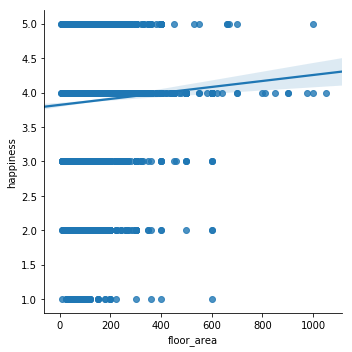

In [28]:
sns.lmplot(x='floor_area',y='happiness',data=train_df,fit_reg='False')

In [29]:
train_df['floor_band']=pd.cut(train_df['floor_area'],5)

/home/ning/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
train_df[['floor_band','happiness']].groupby('floor_band',as_index=False).mean().sort_values(by='happiness',ascending=False)

,floor_band,happiness
3,"(631.2, 840.6]",4.444444
4,"(840.6, 1050.0]",4.142857
1,"(212.4, 421.8]",3.938538
0,"(1.953, 212.4]",3.864417
2,"(421.8, 631.2]",3.774194


In [31]:
train_df.head()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,floor_band
0,4,1,12,1,1,1,1,11,20000,1,45.0,176,155,3,2,5,5,2,4,3,3,3,1,3.0,30.0,1.0,2.0,60000.0,2,2,1,2,3,3,2,4,3,1,"(1.953, 212.4]"
1,4,2,18,1,1,1,1,12,20000,1,110.0,170,110,5,4,3,1,2,4,3,3,6,1,3.0,2.0,1.0,3.0,40000.0,3,4,1,2,1,1,1,4,2,0,"(1.953, 212.4]"
2,4,2,29,2,1,0,3,4,2000,1,120.0,160,122,4,4,5,1,3,4,2,4,5,2,NaN,NaN,NaN,NaN,8000.0,3,3,1,2,3,2,1,4,2,1,"(1.953, 212.4]"
3,5,2,10,2,1,1,1,3,6420,1,78.0,163,170,4,4,4,1,2,4,4,4,5,4,NaN,NaN,NaN,NaN,12000.0,3,3,1,1,7,2,1,3,2,2,"(1.953, 212.4]"
5,5,2,18,1,1,1,1,2,5000,1,300.0,172,140,5,5,4,1,3,3,2,4,8,4,NaN,NaN,NaN,NaN,5000.0,2,3,1,2,3,3,1,4,3,2,"(212.4, 421.8]"


In [32]:
test_df.describe()

,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age
count,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,1078.000000,1078.000000,1079.000000,1079.000000,2.968000e+03,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000
mean,1.422507,15.295485,1.537062,1.356469,0.887803,1.455863,4.833895,24764.746968,1.359838,117.819340,163.677898,120.819407,3.612871,3.855795,3.791105,1.879380,2.824124,3.314690,1.919811,3.122978,4.210916,2.995620,3.116883,14.300557,0.911956,2.601483,6.244181e+04,2.879717,2.574124,1.081199,1.820081,3.263140,2.229111,1.714286,3.253706,1.089286,1.226752
std,0.494042,8.906772,0.498709,1.380061,0.315662,1.354842,3.130092,42247.632722,0.921176,99.949683,8.098360,23.041669,1.086763,1.069269,1.151849,1.323712,1.060393,1.054318,1.175660,1.393339,1.992061,1.752743,1.748131,11.205625,1.411139,1.888997,2.627339e+05,1.458799,1.094105,1.910487,0.488466,1.455495,0.931457,0.844442,2.187685,3.419612,0.907297
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-3.000000,1.000000,0.000000,100.000000,45.000000,1.000000,1.000000,-8.000000,1.000000,1.000000,-8.000000,-8.000000,-8.000000,-8.000000,1.000000,-8.000000,-3.000000,-8.000000,-8.000000,-3.000000e+00,-3.000000,-8.000000,-3.000000,-8.000000,1.000000,-8.000000,-8.000000,-8.000000,-8.000000,0.000000
25%,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1500.000000,1.000000,66.000000,158.000000,105.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,3.000000,5.000000,1.000000,2.000000,1.200000e+04,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000
50%,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,4.000000,14000.000000,1.000000,100.000000,163.000000,120.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,2.000000,4.000000,5.000000,3.000000,3.000000,12.000000,1.000000,3.000000,3.985000e+04,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000
75%,2.000000,22.000000,2.000000,1.000000,1.000000,1.000000,6.000000,30000.000000,1.000000,140.000000,170.000000,135.000000,4.000000,5.000000,4.000000,2.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,3.000000,22.000000,1.000000,3.000000,7.000000e+04,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000
max,2.000000,31.000000,2.000000,8.000000,1.000000,9.000000,14.000000,800000.000000,4.000000,2400.000000,194.000000,213.000000,5.000000,5.000000,5.000000,8.000000,5.000000,5.000000,5.000000,5.000000,10.000000,6.000000,9.000000,48.000000,2.000000,4.000000,9.924000e+06,11.000000,5.000000,96.000000,2.000000,7.000000,3.000000,3.000000,5.000000,4.000000,3.000000


In [33]:
train_df['new_band']=pd.qcut(train_df['floor_area'],[0,0.25,0.5,0.75,0.85,1])

/home/ning/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
train_df[['new_band','happiness']].groupby('new_band',as_index=False).mean().sort_values(by='happiness',ascending=False)

,new_band,happiness
3,"(130.0, 180.0]",3.924222
4,"(180.0, 1050.0]",3.914027
1,"(63.0, 95.0]",3.906168
2,"(95.0, 130.0]",3.899424
0,"(2.999, 63.0]",3.759979


In [35]:
combine=[train_df,test_df]
for datasets in combine:
    datasets.loc[(datasets['floor_area']<=63),'floor_area']=0
    datasets.loc[(datasets['floor_area']>63)&(datasets['floor_area']<=95),'floor_area']=1
    datasets.loc[(datasets['floor_area']>95)&(datasets['floor_area']<=130),'floor_area']=2
    datasets.loc[(datasets['floor_area']>130)&(datasets['floor_area']<=180),'floor_area']=3
    datasets.loc[(datasets['floor_area']>180),'floor_area']=4
    
train_df.head()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,floor_band,new_band
0,4,1,12,1,1,1,1,11,20000,1,0.0,176,155,3,2,5,5,2,4,3,3,3,1,3.0,30.0,1.0,2.0,60000.0,2,2,1,2,3,3,2,4,3,1,"(1.953, 212.4]","(2.999, 63.0]"
1,4,2,18,1,1,1,1,12,20000,1,2.0,170,110,5,4,3,1,2,4,3,3,6,1,3.0,2.0,1.0,3.0,40000.0,3,4,1,2,1,1,1,4,2,0,"(1.953, 212.4]","(95.0, 130.0]"
2,4,2,29,2,1,0,3,4,2000,1,2.0,160,122,4,4,5,1,3,4,2,4,5,2,NaN,NaN,NaN,NaN,8000.0,3,3,1,2,3,2,1,4,2,1,"(1.953, 212.4]","(95.0, 130.0]"
3,5,2,10,2,1,1,1,3,6420,1,1.0,163,170,4,4,4,1,2,4,4,4,5,4,NaN,NaN,NaN,NaN,12000.0,3,3,1,1,7,2,1,3,2,2,"(1.953, 212.4]","(63.0, 95.0]"
5,5,2,18,1,1,1,1,2,5000,1,4.0,172,140,5,5,4,1,3,3,2,4,8,4,NaN,NaN,NaN,NaN,5000.0,2,3,1,2,3,3,1,4,3,2,"(212.4, 421.8]","(180.0, 1050.0]"


In [36]:
test_df.head()

,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age
0,1,2,2,8,0,1,4,18000,1,2.0,155,120,4,4,4,4,3,3,2,2,5,1,5.0,12.0,2.0,3.0,-2,5,3,1,2,3,3,1,4,2,1
1,1,22,2,1,1,1,4,20000,1,0.0,150,75,1,1,2,5,5,4,1,3,3,5,NaN,NaN,NaN,NaN,20000,1,1,2,2,7,3,3,4,2,3
2,2,9,2,1,1,1,1,500,1,0.0,155,85,4,2,2,1,2,3,1,4,1,4,NaN,NaN,NaN,NaN,-2,1,2,1,2,7,3,1,3,4,3
3,2,18,2,1,1,1,4,50000,1,4.0,160,126,5,5,5,1,2,2,2,4,5,5,NaN,NaN,NaN,NaN,100000,2,4,1,2,3,2,1,3,2,0
4,2,24,1,1,1,2,1,0,1,4.0,173,130,4,5,3,4,4,4,2,2,2,2,NaN,NaN,NaN,NaN,30000,3,2,1,2,1,2,2,5,2,0


In [37]:
train_df['bmi']=(train_df['weight_jin']/2)/((train_df['height_cm']/100)**2)

In [38]:
train_df.columns

Index(['happiness', 'survey_type', 'province', 'gender', 'nationality',
       'religion', 'religion_freq', 'edu', 'income', 'political', 'floor_area',
       'height_cm', 'weight_jin', 'health', 'health_problem', 'depression',
       'hukou', 'socialize', 'relax', 'learn', 'equity', 'class', 'work_exper',
       'work_status', 'work_yr', 'work_type', 'work_manage', 'family_income',
       'family_m', 'family_status', 'house', 'car', 'marital', 'status_peer',
       'status_3_before', 'view', 'inc_ability', 'Age', 'floor_band',
       'new_band', 'bmi'],
      dtype='object')

In [39]:
test_df['bmi']=(test_df['weight_jin']/2)/((test_df['height_cm']/100)**2)

In [40]:
train_df=train_df.drop(['floor_band','new_band'],axis=1)

In [41]:
combine=[train_df,test_df]

肥胖度采用BMI国际标准来分类，18.5,18.5～22.9,23～24.9,25～29.9,30

In [42]:
for datasets in combine:
    datasets.loc[(datasets['bmi']<=18.5),'bmi']=0
    datasets.loc[(datasets['bmi']>18.5)&(datasets['bmi']<=22.9),'bmi']=1
    datasets.loc[(datasets['bmi']>22.9)&(datasets['bmi']<=24.9),'bmi']=2
    datasets.loc[(datasets['bmi']>24.9)&(datasets['bmi']<=30),'bmi']=3
    datasets.loc[(datasets['bmi']>30),'bmi']=4
    
train_df.head()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
0,4,1,12,1,1,1,1,11,20000,1,0.0,176,155,3,2,5,5,2,4,3,3,3,1,3.0,30.0,1.0,2.0,60000.0,2,2,1,2,3,3,2,4,3,1,3.0
1,4,2,18,1,1,1,1,12,20000,1,2.0,170,110,5,4,3,1,2,4,3,3,6,1,3.0,2.0,1.0,3.0,40000.0,3,4,1,2,1,1,1,4,2,0,1.0
2,4,2,29,2,1,0,3,4,2000,1,2.0,160,122,4,4,5,1,3,4,2,4,5,2,NaN,NaN,NaN,NaN,8000.0,3,3,1,2,3,2,1,4,2,1,2.0
3,5,2,10,2,1,1,1,3,6420,1,1.0,163,170,4,4,4,1,2,4,4,4,5,4,NaN,NaN,NaN,NaN,12000.0,3,3,1,1,7,2,1,3,2,2,4.0
5,5,2,18,1,1,1,1,2,5000,1,4.0,172,140,5,5,4,1,3,3,2,4,8,4,NaN,NaN,NaN,NaN,5000.0,2,3,1,2,3,3,1,4,3,2,2.0


In [43]:
train_df.describe()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
count,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7.554000e+03,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,2801.000000,2801.000000,2801.000000,2801.000000,7.553000e+03,7554.000000,7554.00000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000
mean,3.870532,1.406275,15.249404,1.526211,1.381123,0.895684,1.434869,4.896479,3.525956e+04,1.368944,1.635160,164.051761,121.861266,3.597829,3.843924,3.825655,1.901774,2.791766,3.304342,1.928779,3.148531,4.214985,2.964390,3.177080,14.635130,0.932167,2.689040,7.017173e+04,2.855706,2.60511,1.069235,1.826582,3.247154,2.233254,1.710352,3.337569,1.216971,1.211676,1.583135
std,0.815527,0.491170,8.965740,0.499346,1.438797,0.305690,1.337938,3.118411,2.396215e+05,0.934556,1.345144,8.047282,23.169208,1.073630,1.067247,1.020211,1.348615,1.065662,1.053408,1.169229,1.254746,1.979869,1.744634,1.673125,11.475861,1.326530,1.615345,2.987195e+05,1.510137,1.03270,0.777752,0.450491,1.424082,0.933865,0.935087,1.901284,3.265055,0.894289,1.013891
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,115.000000,40.000000,1.000000,1.000000,-8.000000,1.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,1.000000,-8.000000,-3.000000,-8.000000,-8.000000,-3.000000e+00,-3.000000,-8.00000,-3.000000,-8.000000,1.000000,-8.000000,-8.000000,-8.000000,-8.000000,0.000000,0.000000
25%,4.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000e+03,1.000000,0.000000,158.000000,106.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,3.000000,5.000000,1.000000,2.000000,1.700000e+04,2.000000,2.00000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000e+04,1.000000,1.000000,164.000000,120.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,5.000000,3.000000,3.000000,12.000000,1.000000,3.000000,4.000000e+04,3.000000,3.00000,1.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000
75%,4.000000,2.000000,22.000000,2.000000,1.000000,1.000000,1.000000,6.000000,3.600000e+04,1.000000,2.000000,170.000000,136.000000,4.000000,5.000000,5.000000,2.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,3.000000,23.000000,1.000000,3.000000,7.200000e+04,4.000000,3.00000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000,2.000000
max,5.000000,2.000000,31.000000,2.000000,8.000000,1.000000,9.000000,14.000000,9.999990e+06,4.000000,4.000000,191.000000,260.000000,5.000000,5.000000,5.000000,8.000000,5.000000,5.000000,5.000000,5.000000,10.000000,6.000000,9.000000,55.000000,2.000000,4.000000,9.999992e+06,50.000000,5.00000,30.000000,2.000000,7.000000,3.000000,3.000000,5.000000,4.000000,3.000000,4.000000


In [44]:
combine=[train_df,test_df]
for dataset in combine:
    dataset.loc[dataset['depression'].isin(li[1:6])==False,'depression']=dataset['depression'].mode().iloc[0]
    dataset.loc[dataset['socialize'].isin(li[1:6])==False,'socialize']=dataset['socialize'].mode().iloc[0]
    dataset.loc[dataset['relax'].isin(li[1:6])==False,'relax']=dataset['relax'].mode().iloc[0]
    dataset.loc[dataset['learn'].isin(li[1:6])==False,'learn']=dataset['learn'].mode().iloc[0]
    dataset.loc[dataset['equity'].isin(li[1:6])==False,'equity']=dataset['equity'].mode().iloc[0]
    dataset.loc[dataset['class'].isin(li[1:11])==False,'class']=dataset['class'].mode().iloc[0]
    dataset.loc[dataset['family_m']<0,'family_m']=dataset['family_m'].mode().iloc[0]
    dataset.loc[dataset['family_status'].isin(li[1:6])==False,'family_status']=dataset['family_status'].mode().iloc[0]
    dataset.loc[dataset['house']<0,'house']=dataset['house'].mode().iloc[0]
    dataset.loc[dataset['car'].isin(li[1:3])==False,'car']=dataset['car'].mode().iloc[0]
    dataset.loc[dataset['status_peer'].isin(li[1:4])==False,'status_peer']=dataset['status_peer'].mode().iloc[0]
    dataset.loc[dataset['status_3_before'].isin(li[1:4])==False,'status_3_before']=dataset['status_3_before'].mode().iloc[0]
    dataset.loc[dataset['view'].isin(li[1:6])==False,'view']=dataset['view'].mode().iloc[0]
    dataset.loc[dataset['inc_ability'].isin(li[1:5])==False,'inc_ability']=dataset['inc_ability'].mode().iloc[0]
train_df.describe()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
count,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7.554000e+03,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,2801.000000,2801.000000,2801.000000,2801.000000,7.553000e+03,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000
mean,3.870532,1.406275,15.249404,1.526211,1.381123,0.895684,1.434869,4.896479,3.525956e+04,1.368944,1.635160,164.051761,121.861266,3.597829,3.843924,3.841541,1.901774,2.795737,3.324993,1.947842,3.204130,4.323405,2.964390,3.177080,14.635130,0.932167,2.689040,7.017173e+04,2.866428,2.658989,1.109611,1.833201,3.247154,2.287530,1.761980,3.620334,2.305136,1.211676,1.583135
std,0.815527,0.491170,8.965740,0.499346,1.438797,0.305690,1.337938,3.118411,2.396215e+05,0.934556,1.345144,8.047282,23.169208,1.073630,1.067247,0.924913,1.348615,1.043844,0.943466,1.076908,0.999353,1.633625,1.744634,1.673125,11.475861,1.326530,1.615345,2.987195e+05,1.488658,0.716505,0.679097,0.372821,1.424082,0.548639,0.620712,0.718310,0.545514,0.894289,1.013891
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,115.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8.000000,-3.000000,-8.000000,-8.000000,-3.000000e+00,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000e+03,1.000000,0.000000,158.000000,106.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,3.000000,5.000000,1.000000,2.000000,1.700000e+04,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000e+04,1.000000,1.000000,164.000000,120.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,2.000000,4.000000,5.000000,3.000000,3.000000,12.000000,1.000000,3.000000,4.000000e+04,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000
75%,4.000000,2.000000,22.000000,2.000000,1.000000,1.000000,1.000000,6.000000,3.600000e+04,1.000000,2.000000,170.000000,136.000000,4.000000,5.000000,5.000000,2.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,3.000000,23.000000,1.000000,3.000000,7.200000e+04,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000,2.000000
max,5.000000,2.000000,31.000000,2.000000,8.000000,1.000000,9.000000,14.000000,9.999990e+06,4.000000,4.000000,191.000000,260.000000,5.000000,5.000000,5.000000,8.000000,5.000000,5.000000,5.000000,5.000000,10.000000,6.000000,9.000000,55.000000,2.000000,4.000000,9.999992e+06,50.000000,5.000000,30.000000,2.000000,7.000000,3.000000,3.000000,5.000000,4.000000,3.000000,4.000000


In [45]:
train_df.head()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
0,4,1,12,1,1,1,1,11,20000,1,0.0,176,155,3,2,5,5,2,4,3,3,3,1,3.0,30.0,1.0,2.0,60000.0,2,2,1,2,3,3,2,4,3,1,3.0
1,4,2,18,1,1,1,1,12,20000,1,2.0,170,110,5,4,3,1,2,4,3,3,6,1,3.0,2.0,1.0,3.0,40000.0,3,4,1,2,1,1,1,4,2,0,1.0
2,4,2,29,2,1,0,3,4,2000,1,2.0,160,122,4,4,5,1,3,4,2,4,5,2,NaN,NaN,NaN,NaN,8000.0,3,3,1,2,3,2,1,4,2,1,2.0
3,5,2,10,2,1,1,1,3,6420,1,1.0,163,170,4,4,4,1,2,4,4,4,5,4,NaN,NaN,NaN,NaN,12000.0,3,3,1,1,7,2,1,3,2,2,4.0
5,5,2,18,1,1,1,1,2,5000,1,4.0,172,140,5,5,4,1,3,3,2,4,8,4,NaN,NaN,NaN,NaN,5000.0,2,3,1,2,3,3,1,4,3,2,2.0


In [46]:
len(train_df[train_df['family_income']<0])

410

In [47]:
guess_income=np.array([0.0,0.0,0.0,0.0,0.0,0.0])

In [48]:
guess_income

array([0., 0., 0., 0., 0., 0.])

In [49]:
combine=[train_df,test_df]
for dataset in combine:
    for i in range(1,6):
        guess_df=dataset[(dataset['family_status']==i)&(dataset['family_income']>=0)]['family_income'].dropna()
        guess_money=guess_df.mean()
        guess_income[i]=int(guess_money/0.5+0.5)*0.5
        
    for i in range(1,6):
        dataset.loc[(dataset['family_income']<0)&(dataset['family_status']==i),'family_income']=guess_income[i]
        
train_df.describe()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
count,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7.554000e+03,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,2801.000000,2801.000000,2801.000000,2801.000000,7.553000e+03,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000
mean,3.870532,1.406275,15.249404,1.526211,1.381123,0.895684,1.434869,4.896479,3.525956e+04,1.368944,1.635160,164.051761,121.861266,3.597829,3.843924,3.841541,1.901774,2.795737,3.324993,1.947842,3.204130,4.323405,2.964390,3.177080,14.635130,0.932167,2.689040,7.424571e+04,2.866428,2.658989,1.109611,1.833201,3.247154,2.287530,1.761980,3.620334,2.305136,1.211676,1.583135
std,0.815527,0.491170,8.965740,0.499346,1.438797,0.305690,1.337938,3.118411,2.396215e+05,0.934556,1.345144,8.047282,23.169208,1.073630,1.067247,0.924913,1.348615,1.043844,0.943466,1.076908,0.999353,1.633625,1.744634,1.673125,11.475861,1.326530,1.615345,2.983890e+05,1.488658,0.716505,0.679097,0.372821,1.424082,0.548639,0.620712,0.718310,0.545514,0.894289,1.013891
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,115.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8.000000,-3.000000,-8.000000,-8.000000,0.000000e+00,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000e+03,1.000000,0.000000,158.000000,106.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,3.000000,5.000000,1.000000,2.000000,2.000000e+04,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000e+04,1.000000,1.000000,164.000000,120.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,2.000000,4.000000,5.000000,3.000000,3.000000,12.000000,1.000000,3.000000,4.436700e+04,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000
75%,4.000000,2.000000,22.000000,2.000000,1.000000,1.000000,1.000000,6.000000,3.600000e+04,1.000000,2.000000,170.000000,136.000000,4.000000,5.000000,5.000000,2.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,3.000000,23.000000,1.000000,3.000000,7.998750e+04,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000,2.000000
max,5.000000,2.000000,31.000000,2.000000,8.000000,1.000000,9.000000,14.000000,9.999990e+06,4.000000,4.000000,191.000000,260.000000,5.000000,5.000000,5.000000,8.000000,5.000000,5.000000,5.000000,5.000000,10.000000,6.000000,9.000000,55.000000,2.000000,4.000000,9.999992e+06,50.000000,5.000000,30.000000,2.000000,7.000000,3.000000,3.000000,5.000000,4.000000,3.000000,4.000000


In [50]:
train_df = train_df.drop(['work_status','work_yr','work_type','work_manage'],axis=1)
test_df = test_df.drop(['work_status','work_yr','work_type','work_manage'],axis=1)
train_df.head()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
0,4,1,12,1,1,1,1,11,20000,1,0.0,176,155,3,2,5,5,2,4,3,3,3,1,60000.0,2,2,1,2,3,3,2,4,3,1,3.0
1,4,2,18,1,1,1,1,12,20000,1,2.0,170,110,5,4,3,1,2,4,3,3,6,1,40000.0,3,4,1,2,1,1,1,4,2,0,1.0
2,4,2,29,2,1,0,3,4,2000,1,2.0,160,122,4,4,5,1,3,4,2,4,5,2,8000.0,3,3,1,2,3,2,1,4,2,1,2.0
3,5,2,10,2,1,1,1,3,6420,1,1.0,163,170,4,4,4,1,2,4,4,4,5,4,12000.0,3,3,1,1,7,2,1,3,2,2,4.0
5,5,2,18,1,1,1,1,2,5000,1,4.0,172,140,5,5,4,1,3,3,2,4,8,4,5000.0,2,3,1,2,3,3,1,4,3,2,2.0


In [51]:
test_df.head()

,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
0,1,2,2,8,0,1,4,18000,1,2.0,155,120,4,4,4,4,3,3,2,2,5,1,74158.0,5,3,1,2,3,3,1,4,2,1,3.0
1,1,22,2,1,1,1,4,20000,1,0.0,150,75,1,1,2,5,5,4,1,3,3,5,20000.0,1,1,2,2,7,3,3,4,2,3,0.0
2,2,9,2,1,1,1,1,500,1,0.0,155,85,4,2,2,1,2,3,1,4,1,4,49898.5,1,2,1,2,7,3,1,3,4,3,0.0
3,2,18,2,1,1,1,4,50000,1,4.0,160,126,5,5,5,1,2,2,2,4,5,5,100000.0,2,4,1,2,3,2,1,3,2,0,2.0
4,2,24,1,1,1,2,1,0,1,4.0,173,130,4,5,3,4,4,4,2,2,2,2,30000.0,3,2,1,2,1,2,2,5,2,0,1.0


In [52]:
train_df.describe()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
count,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7.554000e+03,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7.553000e+03,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000
mean,3.870532,1.406275,15.249404,1.526211,1.381123,0.895684,1.434869,4.896479,3.525956e+04,1.368944,1.635160,164.051761,121.861266,3.597829,3.843924,3.841541,1.901774,2.795737,3.324993,1.947842,3.204130,4.323405,2.964390,7.424571e+04,2.866428,2.658989,1.109611,1.833201,3.247154,2.287530,1.761980,3.620334,2.305136,1.211676,1.583135
std,0.815527,0.491170,8.965740,0.499346,1.438797,0.305690,1.337938,3.118411,2.396215e+05,0.934556,1.345144,8.047282,23.169208,1.073630,1.067247,0.924913,1.348615,1.043844,0.943466,1.076908,0.999353,1.633625,1.744634,2.983890e+05,1.488658,0.716505,0.679097,0.372821,1.424082,0.548639,0.620712,0.718310,0.545514,0.894289,1.013891
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,115.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000e+03,1.000000,0.000000,158.000000,106.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000e+04,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000e+04,1.000000,1.000000,164.000000,120.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,2.000000,4.000000,5.000000,3.000000,4.436700e+04,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000
75%,4.000000,2.000000,22.000000,2.000000,1.000000,1.000000,1.000000,6.000000,3.600000e+04,1.000000,2.000000,170.000000,136.000000,4.000000,5.000000,5.000000,2.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,7.998750e+04,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000,2.000000
max,5.000000,2.000000,31.000000,2.000000,8.000000,1.000000,9.000000,14.000000,9.999990e+06,4.000000,4.000000,191.000000,260.000000,5.000000,5.000000,5.000000,8.000000,5.000000,5.000000,5.000000,5.000000,10.000000,6.000000,9.999992e+06,50.000000,5.000000,30.000000,2.000000,7.000000,3.000000,3.000000,5.000000,4.000000,3.000000,4.000000


In [53]:
test_df.describe()

,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
count,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2.968000e+03,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000
mean,1.422507,15.295485,1.537062,1.356469,0.887803,1.455863,4.833895,24764.746968,1.359838,1.701482,163.677898,120.819407,3.612871,3.855795,3.831536,1.879380,2.824124,3.334906,1.941038,3.211927,4.320418,2.995620,6.871949e+04,2.893531,2.640836,1.140162,1.830189,3.263140,2.283019,1.747978,3.645889,2.302224,1.226752,1.566038
std,0.494042,8.906772,0.498709,1.380061,0.315662,1.354842,3.130092,42247.632722,0.921176,1.345518,8.098360,23.041669,1.086763,1.069269,0.925570,1.323712,1.060393,0.946692,1.073108,1.010844,1.644745,1.752743,2.621233e+05,1.431312,0.717899,1.853561,0.375530,1.455495,0.548388,0.627826,0.714063,0.546430,0.907297,0.998323
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-3.000000,1.000000,0.000000,100.000000,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1500.000000,1.000000,1.000000,158.000000,105.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000e+04,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000
50%,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,4.000000,14000.000000,1.000000,2.000000,163.000000,120.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,2.000000,4.000000,5.000000,3.000000,4.989850e+04,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000
75%,2.000000,22.000000,2.000000,1.000000,1.000000,1.000000,6.000000,30000.000000,1.000000,3.000000,170.000000,135.000000,4.000000,5.000000,4.000000,2.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,7.415800e+04,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000,2.000000
max,2.000000,31.000000,2.000000,8.000000,1.000000,9.000000,14.000000,800000.000000,4.000000,4.000000,194.000000,213.000000,5.000000,5.000000,5.000000,8.000000,5.000000,5.000000,5.000000,5.000000,10.000000,6.000000,9.924000e+06,11.000000,5.000000,96.000000,2.000000,7.000000,3.000000,3.000000,5.000000,4.000000,3.000000,4.000000


In [54]:
a=pd.qcut(train_df['income'],4)

In [55]:
pd.value_counts(a)

(3000.0, 20000.0]       2361
(-0.001, 3000.0]        1973
(36000.0, 9999990.0]    1790
(20000.0, 36000.0]      1430
Name: income, dtype: int64

In [56]:
b=pd.qcut(train_df['family_income'],4)
pd.value_counts(b)

(-0.001, 20000.0]       2116
(44367.0, 79987.5]      1880
(79987.5, 9999992.0]    1828
(20000.0, 44367.0]      1729
Name: family_income, dtype: int64

In [57]:
combine=[train_df,test_df]
for datasets in combine:
    datasets.loc[(datasets['income']<=3000),'income']=0
    datasets.loc[(datasets['income']>3000)&(datasets['income']<=20000),'income']=1
    datasets.loc[(datasets['income']>20000)&(datasets['income']<=36000),'income']=2
    datasets.loc[(datasets['income']>36000),'income']=3
    
    datasets.loc[(datasets['family_income']<=20000),'family_income']=0
    datasets.loc[(datasets['family_income']>20000)&(datasets['family_income']<=44367),'family_income']=1
    datasets.loc[(datasets['family_income']>44367)&(datasets['family_income']<=79987.5),'family_income']=2
    datasets.loc[(datasets['family_income']>79987.5),'family_income']=3
    
train_df.head()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
0,4,1,12,1,1,1,1,11,1,1,0.0,176,155,3,2,5,5,2,4,3,3,3,1,2.0,2,2,1,2,3,3,2,4,3,1,3.0
1,4,2,18,1,1,1,1,12,1,1,2.0,170,110,5,4,3,1,2,4,3,3,6,1,1.0,3,4,1,2,1,1,1,4,2,0,1.0
2,4,2,29,2,1,0,3,4,0,1,2.0,160,122,4,4,5,1,3,4,2,4,5,2,0.0,3,3,1,2,3,2,1,4,2,1,2.0
3,5,2,10,2,1,1,1,3,1,1,1.0,163,170,4,4,4,1,2,4,4,4,5,4,0.0,3,3,1,1,7,2,1,3,2,2,4.0
5,5,2,18,1,1,1,1,2,1,1,4.0,172,140,5,5,4,1,3,3,2,4,8,4,0.0,2,3,1,2,3,3,1,4,3,2,2.0


In [58]:
final_train_df=train_df.drop(['height_cm','weight_jin'],axis=1)

In [59]:
final_train_df.head()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
0,4,1,12,1,1,1,1,11,1,1,0.0,3,2,5,5,2,4,3,3,3,1,2.0,2,2,1,2,3,3,2,4,3,1,3.0
1,4,2,18,1,1,1,1,12,1,1,2.0,5,4,3,1,2,4,3,3,6,1,1.0,3,4,1,2,1,1,1,4,2,0,1.0
2,4,2,29,2,1,0,3,4,0,1,2.0,4,4,5,1,3,4,2,4,5,2,0.0,3,3,1,2,3,2,1,4,2,1,2.0
3,5,2,10,2,1,1,1,3,1,1,1.0,4,4,4,1,2,4,4,4,5,4,0.0,3,3,1,1,7,2,1,3,2,2,4.0
5,5,2,18,1,1,1,1,2,1,1,4.0,5,5,4,1,3,3,2,4,8,4,0.0,2,3,1,2,3,3,1,4,3,2,2.0


In [60]:
final_train_df=final_train_df.dropna(axis=0,how='any')

In [61]:
final_train_df.describe()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
count,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000
mean,3.870647,1.406196,15.247319,1.526149,1.381173,0.895671,1.434927,4.896730,1.401959,1.368992,1.635244,3.598041,3.843771,3.841652,1.901893,2.795578,3.325036,1.947968,3.204422,4.323845,2.964385,1.452800,2.866278,2.659208,1.109625,1.833179,3.247187,2.287568,1.762081,3.620548,2.305044,1.211704,1.583344
std,0.815519,0.491155,8.964502,0.499349,1.438886,0.305708,1.338017,3.118541,1.112195,0.934608,1.345214,1.073544,1.067235,0.924924,1.348665,1.043821,0.943521,1.076924,0.999097,1.633285,1.744749,1.136792,1.488700,0.716298,0.679141,0.372841,1.424174,0.548665,0.620691,0.718116,0.545491,0.894345,1.013794
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,2.000000,4.000000,5.000000,3.000000,1.000000,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000
75%,4.000000,2.000000,22.000000,2.000000,1.000000,1.000000,1.000000,6.000000,2.000000,1.000000,2.000000,4.000000,5.000000,5.000000,2.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,2.000000,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000,2.000000
max,5.000000,2.000000,31.000000,2.000000,8.000000,1.000000,9.000000,14.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,8.000000,5.000000,5.000000,5.000000,5.000000,10.000000,6.000000,3.000000,50.000000,5.000000,30.000000,2.000000,7.000000,3.000000,3.000000,5.000000,4.000000,3.000000,4.000000


In [62]:
final_train_df.shape

(7553, 33)

In [63]:
X=final_train_df.drop('happiness',axis=1)
Y=final_train_df['happiness']
print(X.shape,Y.shape)

(7553, 32) (7553,)


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [66]:
from sklearn import tree

In [95]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)

In [96]:
y_predict=clf.predict(X_test)

In [97]:
y_predict

array([3, 4, 4, ..., 4, 4, 2])

In [102]:
final_test_df=test_df.drop(['height_cm','weight_jin'],axis=1)

In [103]:
final_predict=clf.predict(final_test_df)

In [104]:
final_predict

array([4, 4, 4, ..., 4, 4, 4])

In [72]:
mean_squared_error=(1/len(y_test))*np.sum(np.square(y_predict-y_test))

In [73]:
mean_squared_error

1.0207413945278023

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
clf=RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [94]:
y_predict2=clf.predict(X_test)
y_predict2

array([4, 4, 4, ..., 4, 4, 4])

In [77]:
mean_squared_error=(1/len(y_test))*np.sum(np.square(y_predict2-y_test))

In [78]:
mean_squared_error

0.6690203000882613

In [79]:
test_df.head()

,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
0,1,2,2,8,0,1,4,1,1,2.0,155,120,4,4,4,4,3,3,2,2,5,1,2.0,5,3,1,2,3,3,1,4,2,1,3.0
1,1,22,2,1,1,1,4,1,1,0.0,150,75,1,1,2,5,5,4,1,3,3,5,0.0,1,1,2,2,7,3,3,4,2,3,0.0
2,2,9,2,1,1,1,1,0,1,0.0,155,85,4,2,2,1,2,3,1,4,1,4,2.0,1,2,1,2,7,3,1,3,4,3,0.0
3,2,18,2,1,1,1,4,3,1,4.0,160,126,5,5,5,1,2,2,2,4,5,5,3.0,2,4,1,2,3,2,1,3,2,0,2.0
4,2,24,1,1,1,2,1,0,1,4.0,173,130,4,5,3,4,4,4,2,2,2,2,1.0,3,2,1,2,1,2,2,5,2,0,1.0


In [98]:
final_test_df=test_df.drop(['height_cm','weight_jin'],axis=1)

In [99]:
final_test_df.shape

(2968, 32)

In [101]:
final_predict=clf.predict(final_test_df)
final_predict

array([4, 4, 4, ..., 4, 4, 4])

In [92]:
final_predict=pd.DataFrame({'happiness':final_predict})

In [93]:
final_predict.to_csv('happiness_submit.csv',)

In [105]:
train_df.head()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
0,4,1,12,1,1,1,1,11,1,1,0.0,176,155,3,2,5,5,2,4,3,3,3,1,2.0,2,2,1,2,3,3,2,4,3,1,3.0
1,4,2,18,1,1,1,1,12,1,1,2.0,170,110,5,4,3,1,2,4,3,3,6,1,1.0,3,4,1,2,1,1,1,4,2,0,1.0
2,4,2,29,2,1,0,3,4,0,1,2.0,160,122,4,4,5,1,3,4,2,4,5,2,0.0,3,3,1,2,3,2,1,4,2,1,2.0
3,5,2,10,2,1,1,1,3,1,1,1.0,163,170,4,4,4,1,2,4,4,4,5,4,0.0,3,3,1,1,7,2,1,3,2,2,4.0
5,5,2,18,1,1,1,1,2,1,1,4.0,172,140,5,5,4,1,3,3,2,4,8,4,0.0,2,3,1,2,3,3,1,4,3,2,2.0


In [106]:
test_df.head()

,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi
0,1,2,2,8,0,1,4,1,1,2.0,155,120,4,4,4,4,3,3,2,2,5,1,2.0,5,3,1,2,3,3,1,4,2,1,3.0
1,1,22,2,1,1,1,4,1,1,0.0,150,75,1,1,2,5,5,4,1,3,3,5,0.0,1,1,2,2,7,3,3,4,2,3,0.0
2,2,9,2,1,1,1,1,0,1,0.0,155,85,4,2,2,1,2,3,1,4,1,4,2.0,1,2,1,2,7,3,1,3,4,3,0.0
3,2,18,2,1,1,1,4,3,1,4.0,160,126,5,5,5,1,2,2,2,4,5,5,3.0,2,4,1,2,3,2,1,3,2,0,2.0
4,2,24,1,1,1,2,1,0,1,4.0,173,130,4,5,3,4,4,4,2,2,2,2,1.0,3,2,1,2,1,2,2,5,2,0,1.0


In [107]:
train_df['new_band'] = pd.qcut(train_df['height_cm'],4)

In [108]:
train_df[['new_band','happiness']].groupby('new_band',as_index=False).mean().sort_values(by='happiness',ascending=False)

,new_band,happiness
3,"(170.0, 191.0]",3.910871
1,"(158.0, 164.0]",3.895699
2,"(164.0, 170.0]",3.869048
0,"(114.999, 158.0]",3.817481


In [109]:
train_df['new_band'] = pd.qcut(train_df['height_cm'],[0, 0.15, 0.25,0.5,0.75,0.9,1])

In [110]:
train_df[['new_band','happiness']].groupby('new_band',as_index=False).mean().sort_values(by='happiness',ascending=False)

,new_band,happiness
5,"(175.0, 191.0]",3.957249
2,"(158.0, 164.0]",3.895699
4,"(170.0, 175.0]",3.884411
3,"(164.0, 170.0]",3.869048
1,"(155.0, 158.0]",3.848958
0,"(114.999, 155.0]",3.796941


In [111]:
combine=[train_df,test_df]
for datasets in combine:
    datasets.loc[(datasets['height_cm']<=155),'height_cm']=0
    datasets.loc[(datasets['height_cm']>155)&(datasets['height_cm']<=158),'height_cm']=1
    datasets.loc[(datasets['height_cm']>158)&(datasets['height_cm']<=164),'height_cm']=2
    datasets.loc[(datasets['height_cm']>164)&(datasets['height_cm']<=170),'height_cm']=3
    datasets.loc[(datasets['height_cm']>170)&(datasets['height_cm']<=175),'height_cm']=4
    datasets.loc[(datasets['height_cm']>175)&(datasets['height_cm']<=191),'height_cm']=5

In [112]:
train_df.head()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,Age,bmi,new_band
0,4,1,12,1,1,1,1,11,1,1,0.0,5,155,3,2,5,5,2,4,3,3,3,1,2.0,2,2,1,2,3,3,2,4,3,1,3.0,"(175.0, 191.0]"
1,4,2,18,1,1,1,1,12,1,1,2.0,3,110,5,4,3,1,2,4,3,3,6,1,1.0,3,4,1,2,1,1,1,4,2,0,1.0,"(164.0, 170.0]"
2,4,2,29,2,1,0,3,4,0,1,2.0,2,122,4,4,5,1,3,4,2,4,5,2,0.0,3,3,1,2,3,2,1,4,2,1,2.0,"(158.0, 164.0]"
3,5,2,10,2,1,1,1,3,1,1,1.0,2,170,4,4,4,1,2,4,4,4,5,4,0.0,3,3,1,1,7,2,1,3,2,2,4.0,"(158.0, 164.0]"
5,5,2,18,1,1,1,1,2,1,1,4.0,4,140,5,5,4,1,3,3,2,4,8,4,0.0,2,3,1,2,3,3,1,4,3,2,2.0,"(170.0, 175.0]"
